In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pathlib import Path

base_path = Path('.').resolve()

In [2]:
blast_df = pd.read_csv(base_path/'data'/'chitinase.blastp.tsv', sep='\t')
blast_db = (pd.read_excel(base_path/'2023WEEK6'/'db.ids.organisms.xlsx', header=None)
    .iloc[:, :4]
    .rename({0: 'sseqid', 1: 'function', 2: 'genus_species', 3: 'genus'}, axis=1))

In [3]:
blast_df.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,2743948825,WP_033601260.1,100.000,348,0,0,1,348,1,348,0.000000e+00,714.0
1,2650561198,WP_054668469.1,68.605,344,106,2,27,370,27,368,6.270000e-168,475.0
2,CVPL010W_100116162,WP_054668469.1,65.556,360,104,3,29,388,29,368,3.000000e-171,484.0
3,CVPL010W_100132366,WP_054668469.1,68.874,302,93,1,29,330,29,329,6.270000e-153,435.0
4,CVPL010W_101140521,WP_049445762.1,99.231,130,1,0,1,130,5,134,2.580000e-86,258.0


In [4]:
blast_db.head()

,sseqid,function,genus_species,genus
0,XP_027332927.1,class V chitinase CHIT5-like,Abrus precatorius,Abrus
1,XP_027337223.1,chitinase 2-like,Abrus precatorius,Abrus
2,XP_027338323.1,chitinase 2-like,Abrus precatorius,Abrus
3,XP_027338325.1,chitinase 2-like,Abrus precatorius,Abrus
4,XP_027338326.1,chitinase 2-like,Abrus precatorius,Abrus


In [5]:
# add species info to blast results
df = blast_df.merge(blast_db, on='sseqid', how='left')
df.head(3)

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,function,genus_species,genus
0,2743948825,WP_033601260.1,100.000,348,0,0,1,348,1,348,0.000000e+00,714.0,chitinase,Enterococcus faecalis,Enterococcus
1,2650561198,WP_054668469.1,68.605,344,106,2,27,370,27,368,6.270000e-168,475.0,glycoside hydrolase family 18 protein,Stenotrophomonas acidaminiphila,Stenotrophomonas
2,CVPL010W_100116162,WP_054668469.1,65.556,360,104,3,29,388,29,368,3.000000e-171,484.0,glycoside hydrolase family 18 protein,Stenotrophomonas acidaminiphila,Stenotrophomonas


Next, We want to know which bacterial genus has the highest number of chitinase genes in our metagenomes

,sseqid
genus,
Stenotrophomonas,20
Enterobacter,7
Serratia,4
Lactococcus,3
Enterobacteriaceae,2
compost,2
Enterococcus,1
Gammaproteobacteria,1
Klebsiella,1


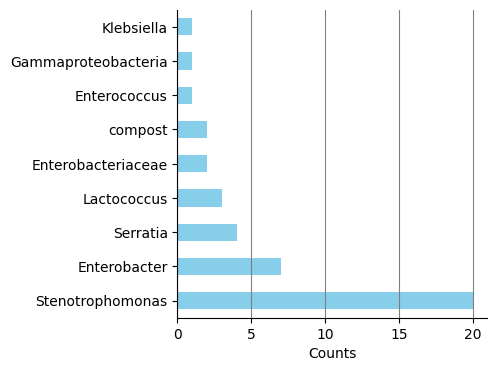

In [6]:
genus_counts = df.pivot_table(
    values='sseqid',
    index='genus',
    aggfunc='count'
).sort_values('sseqid', ascending=False)

display(genus_counts)

fig, ax = plt.subplots(figsize=(4,4))
genus_counts.plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Counts', fontsize=10)
ax.set_ylabel(None)
ax.grid(which='both', axis='x', color='grey')
ax.spines[['top', 'right']].set_visible(False)
ax.legend().remove()

,sseqid
genus_species,
Stenotrophomonas acidaminiphila,17
Serratia marcescens,4
Enterobacter,3
Enterobacter hormaechei,3
Enterobacteriaceae bacterium ATCC 29904,2
Lactococcus lactis,2
compost metagenome,2
Enterobacter hormaechei subsp. steigerwaltii 34998,1
Enterococcus faecalis,1


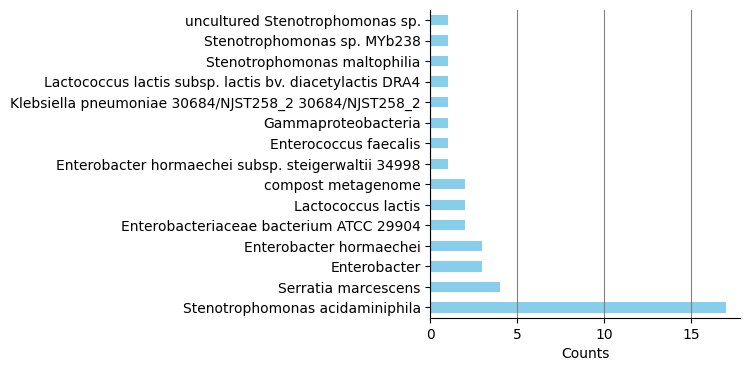

In [7]:
species_counts = df.pivot_table(
    values='sseqid',
    index='genus_species',
    aggfunc='count'
).sort_values('sseqid', ascending=False)

display(species_counts)

fig, ax = plt.subplots(figsize=(4,4))
species_counts.plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Counts', fontsize=10)
ax.set_ylabel(None)
ax.grid(which='both', axis='x', color='grey')
ax.spines[['top', 'right']].set_visible(False)
ax.legend().remove()

,sseqid
function,
glycoside hydrolase family 18 protein,21
chitinase,6
glycoside hydrolase,3
Chitinase,2
Chitinase A1 precursor,2
chitinase A domain protein,2
chitinase A1,2
Alkyl hydroperoxide reductase C22 protein,1
chitinase,1


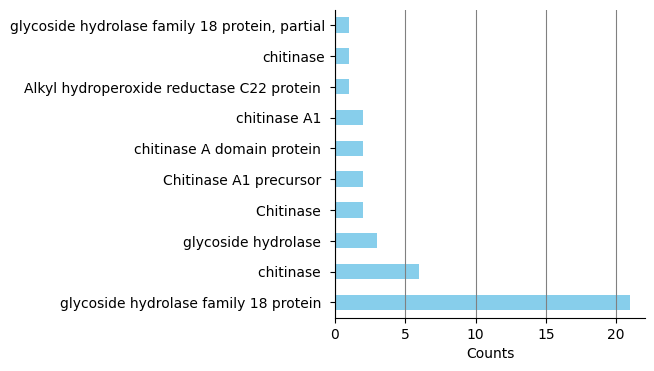

In [8]:
function_counts = df.pivot_table(
    values='sseqid',
    index='function',
    aggfunc='count'
).sort_values('sseqid', ascending=False)

display(function_counts)

fig, ax = plt.subplots(figsize=(4,4))
function_counts.plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Counts', fontsize=10)
ax.set_ylabel(None)
ax.grid(which='both', axis='x', color='grey')
ax.spines[['top', 'right']].set_visible(False)
ax.legend().remove()

In [9]:
genus_function.values

NameError: name 'genus_function' is not defined

<Axes: xlabel='genus', ylabel='function'>

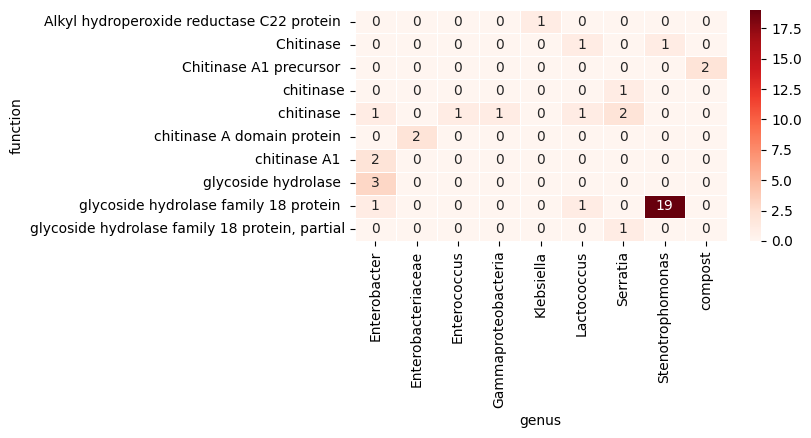

In [13]:
genus_function = df.pivot_table(  
    values='sseqid',
    columns='genus',
    index='function',
    aggfunc='count'
).fillna(0.0)

fig, ax = plt.subplots(figsize=(6,3))
sns.heatmap(
    genus_function, 
    annot=True,
    linewidth=.5,
    cmap='Reds',
    ax=ax
)